## Food Delivery Operations Analysis – Kaggle Notebook
This notebook contains the data loading, cleaning, and exploratory analysis used to build my Looker Studio food delivery time dashboard.

## Step 1: Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'/kaggle/input/food-delivery-time-prediction/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [2]:
df = pd.read_csv(r'/kaggle/input/food-delivery-time-prediction/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Step 2: Data Overview
- The dataset contains 1,000 rows and 9 columns.
- We observe missing values in Weather, Traffic_Level, and Time_of_Day columns.
- Key variables include delivery time, distance, traffic levels, weather conditions, and courier experience.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [5]:
df.duplicated().sum()

0

### Missing values
- Weather: 30 rows
- Traffic_Level: 30 rows
- Time_of_Day: 30 rows
- Courier_Experience_yrs: 30 rows

## Step 3: Data Cleaning

### Data Cleaning Plan
- Handle missing values in the Weather, Traffic_Level, Time_of_Day, and Courier_Experience_yrs columns.
- Convert the data type of Courier_Experience_yrs to integer.
- Investigate outliers in Delivery_Time_min and Distance_km
- Standardize categorical fields such as Weather and Traffic_Level

In [6]:
# Fill missing values with 'Unknown'
df['Weather'] = df['Weather'].fillna('Unknown')
df['Traffic_Level'] = df['Traffic_Level'].fillna('Unknown')
df['Time_of_Day'] = df['Time_of_Day'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [7]:
# Fill missing values with median
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   int64  
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [8]:
# create a csv file for a dashboard
df_dashboard = df
df_dashboard.to_csv('Food_Delivery_Times_for_Dashboard.csv', index = False)

## Step 4: Exploratory Data Analysis (EDA)
- Most deliveries occur during clear weather.
- Traffic density is mostly 'Medium', followed by 'Low'.
- Average delivery time is around 57 minutes.
- Distance ranges from 0.59 km to 19.99 km.

In [9]:
# Value Counts of Categorical Columns
df.Weather.value_counts()

Weather
Clear      470
Rainy      204
Foggy      103
Snowy       97
Windy       96
Unknown     30
Name: count, dtype: int64

In [10]:
df.Traffic_Level.value_counts()

Traffic_Level
Medium     390
Low        383
High       197
Unknown     30
Name: count, dtype: int64

In [11]:
df.Time_of_Day.value_counts()

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Unknown       30
Name: count, dtype: int64

In [12]:
df.Vehicle_Type.value_counts()

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

In [13]:
# Summary Stats for Numeric columns
df[['Delivery_Time_min','Distance_km','Preparation_Time_min','Courier_Experience_yrs']].describe()

,Delivery_Time_min,Distance_km,Preparation_Time_min,Courier_Experience_yrs
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,56.732000,10.059970,16.982000,4.592000
std,22.070915,5.696656,7.204553,2.871198
min,8.000000,0.590000,5.000000,0.000000
25%,41.000000,5.105000,11.000000,2.000000
50%,55.500000,10.190000,17.000000,5.000000
75%,71.000000,15.017500,23.000000,7.000000
max,153.000000,19.990000,29.000000,9.000000


In [14]:
# Delivery Time vs Weather
df.groupby('Weather').Delivery_Time_min.mean().sort_values(ascending = False)

# Observation
# Snowy weather has the longest average delivery time.

Weather
Snowy      67.113402
Rainy      59.794118
Foggy      59.466019
Windy      55.458333
Unknown    54.200000
Clear      53.082979
Name: Delivery_Time_min, dtype: float64

In [15]:
# Delivery Time vs Traffic Level
df.groupby('Traffic_Level').Delivery_Time_min.mean().sort_values(ascending = False)

# Observation
# High traffic density has the longest average delivery time.

Traffic_Level
High       64.807107
Unknown    62.066667
Medium     56.020513
Low        52.885117
Name: Delivery_Time_min, dtype: float64

In [16]:
# Delivery Time vs Distance
df['div_km'] = pd.cut(df['Distance_km'], bins = [0,5,10,15,20], labels = ['0-5 km', '5-10 km', '10-15 km', '15-20 km'])

df.groupby('div_km').Delivery_Time_min.mean().sort_values(ascending = False)
# Observation
# The longer the distance category, the longer the average delivery time.

/tmp/ipykernel_13/919981402.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('div_km').Delivery_Time_min.mean().sort_values(ascending = False)


div_km
15-20 km    79.398406
10-15 km    63.361538
5-10 km     49.029046
0-5 km      34.326613
Name: Delivery_Time_min, dtype: float64

In [17]:
# Delivery Time vs Preparation Time
df['div_pre_min'] = pd.cut(df['Preparation_Time_min'], bins = [5,13,21,29], labels = ['5-13 min', '13-21 min', '21-29 min'])
df.groupby('div_pre_min').Delivery_Time_min.mean().sort_values(ascending = False)

# Observation
# Preparation time shows a strong relationship with delivery time.

/tmp/ipykernel_13/1569806864.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('div_pre_min').Delivery_Time_min.mean().sort_values(ascending = False)


div_pre_min
21-29 min    64.728395
13-21 min    56.481013
5-13 min     49.930303
Name: Delivery_Time_min, dtype: float64

<Axes: >

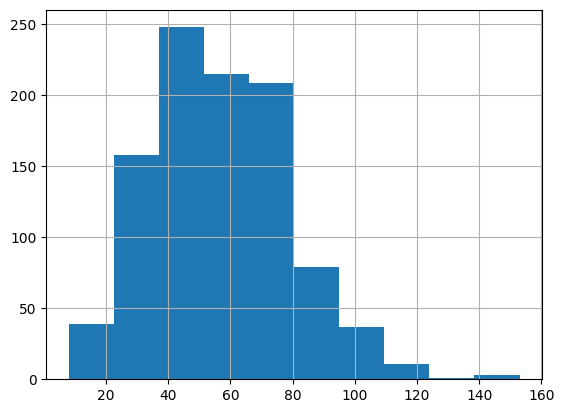

In [18]:
# Are there slower delivery time outliers?
df['Delivery_Time_min'].hist()

# Observation
# A few large values exist above 120 minutes, but they appear realistic.

In [19]:
# Delivery Time vs Vehicle Type
df.groupby('Vehicle_Type').Delivery_Time_min.mean().sort_values(ascending = False)

# Observation
# The car category has the longest average delivery time.

Vehicle_Type
Car        58.200000
Bike       56.574553
Scooter    56.046358
Name: Delivery_Time_min, dtype: float64

In [20]:
# Delivery Time vs Courier Experience years
df['div_Experience_yrs'] = pd.cut(df['Courier_Experience_yrs'], bins = [0,3,6,9])
df.groupby('div_Experience_yrs').Delivery_Time_min.mean().sort_values(ascending = False)

# Observation
# Courier experience years show only a weak relationship with average delivery time.

/tmp/ipykernel_13/1074557505.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('div_Experience_yrs').Delivery_Time_min.mean().sort_values(ascending = False)


div_Experience_yrs
(0, 3]    58.311189
(3, 6]    56.597523
(6, 9]    54.310000
Name: Delivery_Time_min, dtype: float64

## Step 5: SQL Analysis
Below are queries used to validate patterns using SQL

In [21]:
# Set up SQL
import sqlite3
df_clean = df
df_clean = df_clean.drop(columns = ['div_Experience_yrs'])
conn = sqlite3.connect(':memory:')

In [22]:
# Load the data into SQL
df_clean.to_sql('deliveries', conn, index = False, if_exists = 'replace')

1000

In [23]:
# SQL Analysis: Average Delivery Time by Weather
query_weather = """
                SELECT Weather, AVG(Delivery_Time_min) AS Average_delivery_time
                FROM 'deliveries'
                GROUP BY Weather
                ORDER BY Average_delivery_time DESC
                """

pd.read_sql_query(query_weather, conn)

# Observation
# Weather conditions show a clear relationship with average delivery time.

,Weather,Average_delivery_time
0,Snowy,67.113402
1,Rainy,59.794118
2,Foggy,59.466019
3,Windy,55.458333
4,Unknown,54.200000
5,Clear,53.082979


In [24]:
# SQL Analysis: Average Delivery Time by Traffic Level
query_traffic = """
                SELECT Traffic_Level, AVG(Delivery_Time_min) AS Average_delivery_time
                FROM 'deliveries'
                GROUP BY Traffic_Level
                ORDER BY Average_delivery_time DESC
                """

pd.read_sql_query(query_traffic, conn)

# Observation
# Traffic levels show a clear relationship with the average delivery time.

,Traffic_Level,Average_delivery_time
0,High,64.807107
1,Unknown,62.066667
2,Medium,56.020513
3,Low,52.885117


In [25]:
# SQL Analysis: Count Deliveries by Distance Group
query_distance = """
                 SELECT div_km as Distance_category, COUNT(div_km) AS Count_delivery
                 FROM 'deliveries'
                 GROUP BY div_km
                 ORDER BY Count_delivery DESC
                 """
pd.read_sql_query(query_distance, conn)

# Observation
# Longer distance groups have slightly more orders than the shorter ones.

,Distance_category,Count_delivery
0,10-15 km,260
1,15-20 km,251
2,0-5 km,248
3,5-10 km,241


### Why SQL is used
To validate three key drivers identified during exploratory data analysis.

### What this section validates
- - Weather conditions, traffic levels, and delivery distance are key drivers of delivery performance.
- Delivery counts are distributed across different delivery distance categories, with slightly higher volumes in longer distance groups.

### Final Insights for Dashboard
- Insight 1: Weather conditions and traffic levels significantly increase average delivery time.
- Insight 2: Average delivery time increases as the delivery distance becomes longer.
- Insight 3: Longer preparation times are associated with higher overall delivery times.

## Step 6: KPIs
1. Delivery Time\
Measures the overall average delivery time across all orders.
2. Delivery Time by Weather\
Measures how different weather conditions impact average delivery time.
3. Delivery Time by Traffic Level\
Measures how traffic density affects average delivery time.
4. Delivery Time by Distance\
Measures average delivery time across four distance categories.
5. Delivery Time by Preparation Time\
Measures how restaurant preparation time influences average delivery time.

## Step 7: Summary 
This notebook prepares and explores the food delivery time dataset used in the Looker Studio dashboard. The grouped variables created during EDA and validated using SQL help visualize delivery performance clearly.